# Method 1: Haar Cascade Classifier

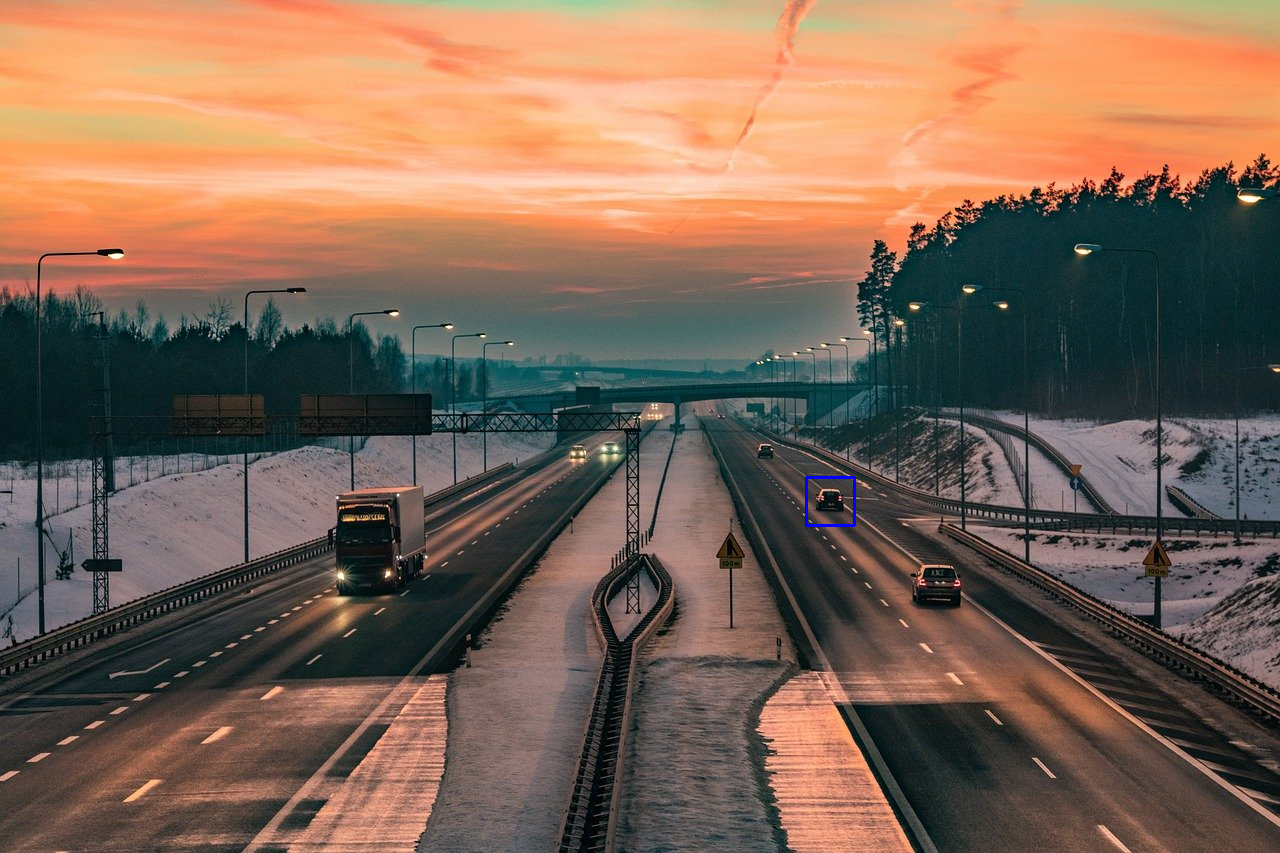

In [1]:
import cv2
from PIL import Image

# Load classifier and image
model = cv2.CascadeClassifier('haarcascade_car.xml')
img = cv2.imread('../../datasets/images/test/highway.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect cars
cars = model.detectMultiScale(gray, 1.1, 4)

# Draw rectangles around cars
for (x, y, w, h) in cars:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # to RGB
img = Image.fromarray(img)
img

# Method 2: YOLO

In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\joena\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8n.pt') # version 8 - size nano

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [01:31<00:00, 71.3kB/s]


In [20]:
result = model('../../datasets/images/test/highway3.jpg', conf=0.5)[0]


image 1/1 C:\Users\joena\joe nasr\ulfg\Frameworks\ML\CNN\ObjectDetection\..\..\datasets\images\test\highway3.jpg: 384x640 3 cars, 1 truck, 140.6ms
Speed: 0.0ms preprocess, 140.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


In [21]:
result.save(filename="highway-detection.jpg")

'highway-detection.jpg'

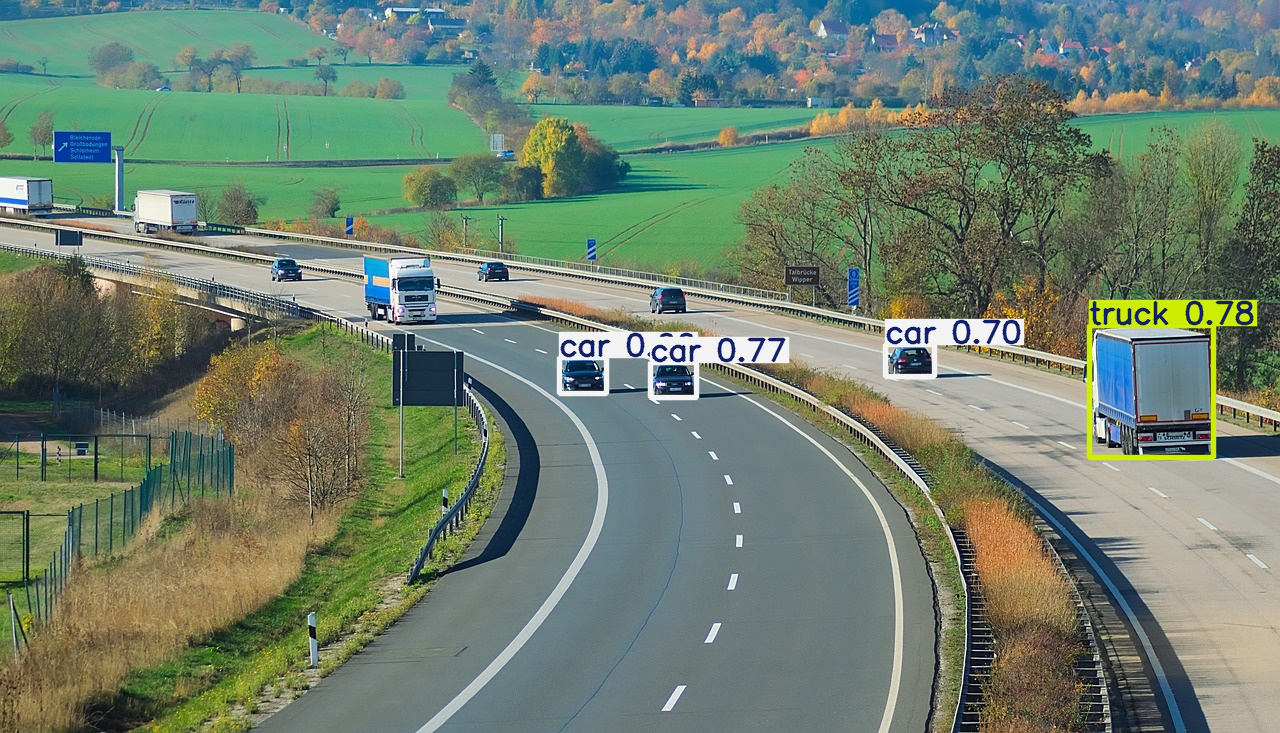

In [22]:
img = Image.open('highway-detection.jpg')
img